In [1]:
from lasagne import layers
from lasagne import nonlinearities
from nolearn.lasagne import BatchIterator
from lasagne import nonlinearities
from nolearn.lasagne import NeuralNet
import time


import pickle
import gzip
import numpy as np
from sklearn.cross_validation import KFold
from sklearn.cross_validation import StratifiedKFold


In [2]:
start = time.time()
with gzip.open('data/data.pkl.gz', 'rb') as f:
    X,Y = pickle.load(f)
print ("Loaded data in " + str(time.time() - start))
print ("   " + str(X.shape) + " y " + str(Y.shape))

Loaded data in 1.37432193756
   (320, 1, 160, 160) y (320, 1, 160, 160)


In [3]:
X = X / X.max() #Simple Normalization, I don't want to remove the zeros since I think they have information

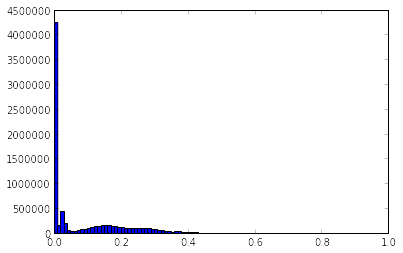

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as imgplot
%matplotlib inline
plt.hist(X.reshape(320*160*160),100);

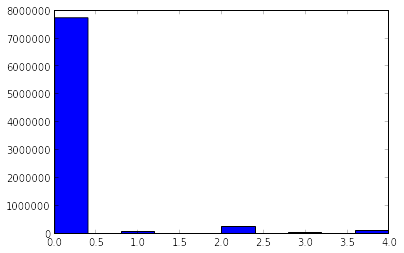

In [5]:
plt.hist(Y.reshape(320*160*160),10);

In [6]:
from FirstTry import PIXELS, net1
net1.max_epochs = 2
net1.fit(X[0:240,:,:,:],Y[0:240,:,:,:]) #Achtung Zahlen sind noch festcodiert

  InputLayer        	(None, 1, 48, 48)   	produces    2304 outputs
  Conv2DLayer       	(None, 32, 46, 46)  	produces   67712 outputs
  MaxPool2DLayer    	(None, 32, 23, 23)  	produces   16928 outputs
  Conv2DLayer       	(None, 64, 22, 22)  	produces   30976 outputs
  MaxPool2DLayer    	(None, 64, 11, 11)  	produces    7744 outputs
  DenseLayer        	(None, 500)         	produces     500 outputs
  DenseLayer        	(None, 10)          	produces      10 outputs

 Epoch  |  Train loss  |  Valid loss  |  Train / Val  |  Valid acc  |  Dur
--------|--------------|--------------|---------------|-------------|-------
     1  |    1.253492  |    1.363439  |     0.919360  |     87.50%  |  7.3s
     2  |    1.203677  |    1.624962  |     0.740741  |     85.00%  |  7.4s


FirstTry.py:32: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if  not yb == None:


MyNeuralNet(X_tensor_type=<function tensor4 at 0x10bcfed70>,
      batch_iterator_test=<FirstTry.SimpleBatchIterator object at 0x10d2ad450>,
      batch_iterator_train=<FirstTry.SimpleBatchIterator object at 0x10d2adfd0>,
      conv1_filter_size=(3, 3), conv1_num_filters=32,
      conv2_filter_size=(2, 2), conv2_num_filters=64, eval_size=0.2,
      hidden4_num_units=500, input_shape=(None, 1, 48, 48),
      layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('conv1', <class 'lasagne.layers.conv.Conv2DLayer'>), ('pool1', <class 'lasagne.layers.pool.MaxPool2DLayer'>), ('conv2', <class 'lasagne.layers.conv.Conv2DLayer'>), ('pool2', <class 'lasagne.layers.pool.MaxPool2DLayer'>), ('hidden4', <class 'lasagne.layers.dense.DenseLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
      loss=<function negative_log_likelihood at 0x10c460320>, max_epochs=2,
      more_params={}, on_epoch_finished=(), on_training_finished=(),
      output_nonlinearity=<theano.tensor.nnet.nn

In [7]:
import cPickle as pickle
with open('data/net1.pickle', 'wb') as f:
    pickle.dump(net1, f, -1)

In [8]:
%ls -rtlh data

total 137496
-rw-r--r--  1 oli  staff   7.7M Mar 27 14:57 data.pkl.gz
-rw-r--r--  1 oli  staff    59M Mar 27 19:16 net1.pickle


In [10]:
import cPickle as pickle
from FirstTry import PIXELS, net1, MyNeuralNet, SimpleBatchIterator
start = time.time()
with open('data/net1.pickle', 'rb') as f:
    net_pretrain = pickle.load(f)
print (time.time() - start)


1.42953801155


In [30]:
ddd = X[240:320,:,48:(48+48),48:(48+48)]

yPred = np.zeros((16*5,1,160, 160)) - 1
res = net_pretrain.predict(ddd)




In [23]:
yPred.shape


(80, 1, 160, 160)